In [500]:
import os
os.chdir(os.getcwd())

# Import Module

In [501]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn import metrics
from sklearn.cluster import KMeans

import matplotlib as mpl
%matplotlib inline
mpl.font_manager.fontManager.addfont('../thsarabunnew-webfont.ttf')
sns.set(font='TH Sarabun New')


# Import Data 

In [502]:
# Code
df = pd.read_excel('assignment2_clustering_data.xlsx',sheet_name='2564')
df.tail()

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม
28,หน่วยงานอื่นของรัฐ,-,-,-,563.2,-,563.2
29,สภากาชาดไทย,-,-,-,8871.6,-,8871.6
30,ส่วนราชการในพระองค์,-,-,-,8980.9,-,8980.9
31,ทุนหมุนเวียน,-,-,-,19916.6,203108.1,223024.7
32,รวมทั้งสิ้น,641434.7,234204.2,500113.7,1117797.4,792412.5,3285962.5


# Part 1

ใช้งบประมาณรายจ่ายส่วนย่อย 5 ด้าน ในปี 2564 จัดกลุ่มกระทรวงตามงบประมาณรายจ่าย ด้วยวิธี K-mean, Hierarchical และ DBScan   ในแต่ละวิธี  ให้เหตุผลในการเลือก ค่า parameter ในการทำ clustering   ระบุว่า วิธีใด ให้ผลลัพธ์ Clustering ที่ดีที่สุด อภิปรายเหตุผล ว่า เพราะเหตุใดจึงเป็นเช่นนั้่น

# K-mean

In [503]:
# Code
main_2564=pd.read_excel('assignment2_clustering_data.xlsx', sheet_name='2564').drop(32)
main_2564.tail()

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม
27,องค์กรปกครองส่วนท้องถิ่น,-,-,-,91348.5,-,91348.5
28,หน่วยงานอื่นของรัฐ,-,-,-,563.2,-,563.2
29,สภากาชาดไทย,-,-,-,8871.6,-,8871.6
30,ส่วนราชการในพระองค์,-,-,-,8980.9,-,8980.9
31,ทุนหมุนเวียน,-,-,-,19916.6,203108.1,223024.7


In [504]:
'''

    งบบุคลากร(1.1)

'''

'\n\n    งบบุคลากร(1.1)\n\n'

In [505]:
k_mean_2564_1=main_2564[['งบบุคลากร']]
k_mean_2564_1.replace({'-':np.nan},inplace=True)
k_mean_2564_1=k_mean_2564_1.dropna()
k_mean_2564_1.tail()

C:\Users\TTCOM\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,งบบุคลากร
17,2321.9
18,223199.6
19,107548.0
20,1635.9
21,82025.0


In [506]:
''' 

    CODE FOR CUT OUTLINER

'''

' \n\n    CODE FOR CUT OUTLINER\n\n'

<AxesSubplot:>

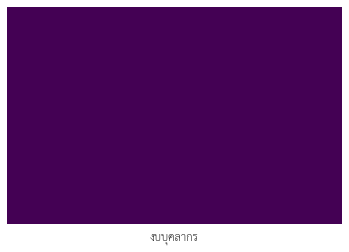

In [507]:
sns.heatmap(k_mean_2564_1.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [508]:
k_mean_2564_1.describe()

,งบบุคลากร
count,22.000000
mean,29156.122727
std,53267.919959
min,822.000000
25%,2415.750000
50%,10034.150000
75%,18395.150000
max,223199.600000


In [509]:
# ทด
# k_mean_2564_drop

In [510]:
scaler = StandardScaler()
array_normalized = scaler.fit_transform(k_mean_2564_1)
k_mean_2564_1_normalized = pd.DataFrame(array_normalized)
k_mean_2564_1_normalized.head()

,0
0,-0.262400
1,-0.481362
2,1.188844
3,-0.310663
4,-0.508401


In [511]:
k_mean_2564_1_normalized.describe()

,0
count,2.200000e+01
mean,-2.018587e-17
std,1.023533e+00
min,-5.444346e-01
25%,-5.138110e-01
50%,-3.674250e-01
75%,-2.067700e-01
max,3.728507e+00


Text(0, 0.5, 'SSE')

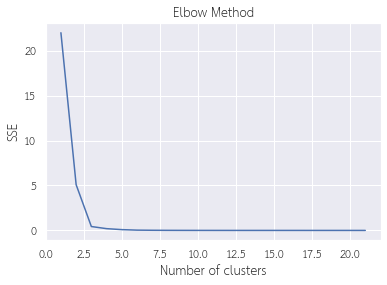

In [512]:
max_k = 22
sse = []
for i in range(1, max_k):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(k_mean_2564_1_normalized)
    sse.append(kmeans.inertia_)
plt.plot(range(1, max_k), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

In [513]:
k_1=3
# เพราะเป็นค่า Number of cluster ที่่ให้ความชันมากที่สุด

In [514]:
kmeans_1 = KMeans(n_clusters=k_1)
kmeans_1.fit(k_mean_2564_1_normalized)

KMeans(n_clusters=3)

In [515]:
cluster_predictions = kmeans_1.predict(k_mean_2564_1_normalized)
k_mean_2564_1['cluster_id'] = cluster_predictions
k_mean_2564_1

,งบบุคลากร,cluster_id
0,15500.0,1
1,4104.5,1
2,91027.4,0
3,12988.2,1
4,2697.3,1
5,1572.6,1
6,2746.6,1
7,11248.4,1
8,24376.6,1
9,9704.7,1


In [516]:
k_mean_2564_1.cluster_id.value_counts()

1    18
0     3
2     1
Name: cluster_id, dtype: int64

In [517]:
print(metrics.silhouette_score(k_mean_2564_1,kmeans_1.labels_))
'''

    I.   S (i)ใกล้กับ 0 หมายความว่าจุดอยู่ระหว่างสองคลัสเตอร์
    II.  ถ้ามันใกล้ -1 มากขึ้นเราก็ควรกำหนดให้กับคลัสเตอร์อื่นดีกว่า
    III. ถ้าS (i)อยู่ใกล้ 1 แสดงว่าจุดนั้นเป็นของคลัสเตอร์ "ถูกต้อง"

'''

0.851381957834223


'\n\n    I.   S (i)ใกล้กับ 0 หมายความว่าจุดอยู่ระหว่างสองคลัสเตอร์\n    II.  ถ้ามันใกล้ -1 มากขึ้นเราก็ควรกำหนดให้กับคลัสเตอร์อื่นดีกว่า\n    III. ถ้าS (i)อยู่ใกล้ 1 แสดงว่าจุดนั้นเป็นของคลัสเตอร์ "ถูกต้อง"\n\n'

In [518]:
print(metrics.davies_bouldin_score(k_mean_2564_1,kmeans_1.labels_))
# ยิ่งมีค่าน่อยยิ่งดี

0.14256355307886623


In [519]:
'''

    งบดําเนินงาน (1.2)

'''

'\n\n    งบดําเนินงาน (1.2)\n\n'

In [520]:
k_mean_2564_2=main_2564[['งบดําเนินงาน']]
k_mean_2564_2.replace({'-':np.nan},inplace=True)
k_mean_2564_2=k_mean_2564_2.dropna()
k_mean_2564_2.tail()

C:\Users\TTCOM\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,งบดําเนินงาน
18,20029.5
19,14411.4
20,603.4
21,18260.1
22,2824.2


In [521]:
''' 

    CODE FOR CUT OUTLINER

'''

' \n\n    CODE FOR CUT OUTLINER\n\n'

<AxesSubplot:>

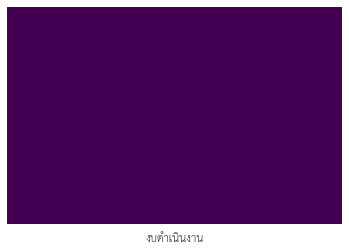

In [522]:
sns.heatmap(k_mean_2564_2.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [523]:
k_mean_2564_2.describe()

,งบดําเนินงาน
count,23.000000
mean,10182.791304
std,18722.586429
min,531.200000
25%,1507.950000
50%,2824.200000
75%,12106.950000
max,89908.000000


In [524]:
scaler = StandardScaler()
array_normalized = scaler.fit_transform(k_mean_2564_2)
k_mean_2564_2_normalized = pd.DataFrame(array_normalized)
k_mean_2564_2_normalized.head()


,0
0,4.353940
1,-0.387989
2,0.760203
3,-0.197416
4,-0.419047


In [525]:
k_mean_2564_2_normalized.describe()

,0
count,2.300000e+01
mean,-6.757879e-17
std,1.022475e+00
min,-5.270911e-01
25%,-4.737490e-01
50%,-4.018661e-01
75%,1.050818e-01
max,4.353940e+00


Text(0, 0.5, 'SSE')

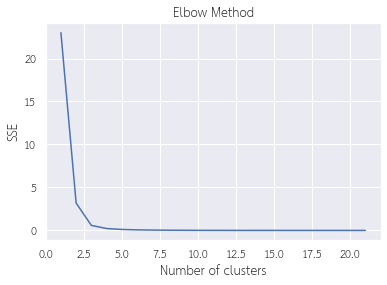

In [526]:
max_k = 22
sse = []
for i in range(1, max_k):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(k_mean_2564_2_normalized)
    sse.append(kmeans.inertia_)
plt.plot(range(1, max_k), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

In [527]:
k_2=3

In [528]:
kmeans_2 = KMeans(n_clusters=k_2)
kmeans_2.fit(k_mean_2564_2_normalized)

KMeans(n_clusters=3)

In [529]:
cluster_predictions = kmeans_2.predict(k_mean_2564_2_normalized)
k_mean_2564_2['cluster_id'] = cluster_predictions
k_mean_2564_2

,งบดําเนินงาน,cluster_id
0,89908.0,1
1,3078.3,0
2,24102.9,2
3,6567.9,0
4,2509.6,0
5,892.1,0
6,2519.3,0
7,939.9,0
8,11495.8,2
9,2436.2,0


In [530]:
k_mean_2564_2.cluster_id.value_counts()

0    16
2     6
1     1
Name: cluster_id, dtype: int64

In [531]:
print(metrics.silhouette_score(k_mean_2564_2,kmeans_2.labels_))

0.7037863620181773


In [532]:
print(metrics.davies_bouldin_score(k_mean_2564_2,kmeans_2.labels_))

0.28113833548558614


In [533]:
'''

    งบลงทุน(1.3)

'''

'\n\n    งบลงทุน(1.3)\n\n'

In [534]:
k_mean_2564_3=main_2564[['งบลงทุน']]
k_mean_2564_3.replace({'-':np.nan},inplace=True)
k_mean_2564_3=k_mean_2564_3.dropna()
k_mean_2564_3.tail()

C:\Users\TTCOM\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,งบลงทุน
19,17025.5
20,745.8
21,20895.0
22,19502.0
23,17357.8


In [535]:
''' 

    CODE FOR CUT OUTLINER

'''

' \n\n    CODE FOR CUT OUTLINER\n\n'

<AxesSubplot:>

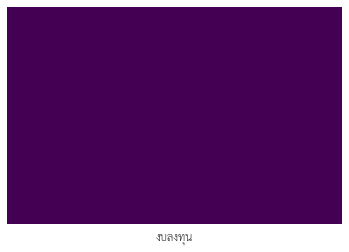

In [536]:
sns.heatmap(k_mean_2564_3.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [537]:
k_mean_2564_3.describe()

,งบลงทุน
count,24.000000
mean,20838.070833
std,38289.285601
min,375.700000
25%,1143.900000
50%,8030.350000
75%,19453.250000
max,177009.100000


In [538]:
scaler = StandardScaler()
array_normalized = scaler.fit_transform(k_mean_2564_3)
k_mean_2564_3_normalized = pd.DataFrame(array_normalized)
k_mean_2564_3_normalized.head()

,0
0,1.095478
1,-0.393078
2,-0.171063
3,-0.464659
4,-0.545328


In [539]:
k_mean_2564_3_normalized.describe()

,0
count,2.400000e+01
mean,7.401487e-17
std,1.021508e+00
min,-5.459092e-01
25%,-5.254146e-01
50%,-3.416932e-01
75%,-3.694520e-02
max,4.166438e+00


Text(0, 0.5, 'SSE')

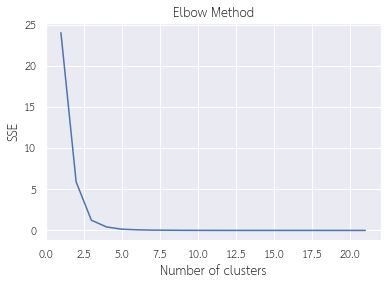

In [540]:
max_k = 22
sse = []
for i in range(1, max_k):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(k_mean_2564_3_normalized)
    sse.append(kmeans.inertia_)
plt.plot(range(1, max_k), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

In [541]:
k_3=3

In [542]:
kmeans_3 = KMeans(n_clusters=k_3)
kmeans_3.fit(k_mean_2564_3_normalized)

KMeans(n_clusters=3)

In [543]:
cluster_predictions = kmeans_3.predict(k_mean_2564_3_normalized)
k_mean_2564_3['cluster_id'] = cluster_predictions
k_mean_2564_3

,งบลงทุน,cluster_id
0,61900.0,2
1,6104.3,0
2,14426.1,0
3,3421.2,0
4,397.5,0
5,1564.4,0
6,397.8,0
7,9956.4,0
8,72292.8,2
9,177009.1,1


In [544]:

k_mean_2564_3.cluster_id.value_counts()

0    20
2     3
1     1
Name: cluster_id, dtype: int64

In [545]:
print(metrics.silhouette_score(k_mean_2564_3,kmeans_3.labels_))

0.7390527220988732


In [546]:
print(metrics.davies_bouldin_score(k_mean_2564_3,kmeans_3.labels_))

0.2969922246832037


In [547]:
'''

    งบเงินอุดหนุน(1.4)

'''

'\n\n    งบเงินอุดหนุน(1.4)\n\n'

In [548]:
k_mean_2564_4=main_2564[['งบเงินอุดหนุน']]
k_mean_2564_4.replace({'-':np.nan},inplace=True)
k_mean_2564_4=k_mean_2564_4.dropna()
k_mean_2564_4.tail()

C:\Users\TTCOM\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,งบเงินอุดหนุน
27,91348.5
28,563.2
29,8871.6
30,8980.9
31,19916.6


In [549]:
''' 

    CODE FOR CUT OUTLINER

'''

' \n\n    CODE FOR CUT OUTLINER\n\n'

<AxesSubplot:>

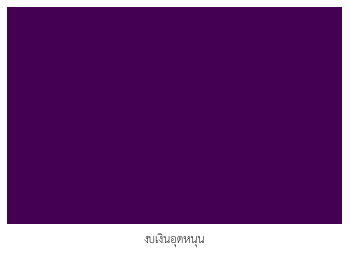

In [550]:
sns.heatmap(k_mean_2564_4.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [551]:
k_mean_2564_4.describe()

,งบเงินอุดหนุน
count,31.000000
mean,36057.980645
std,78764.467952
min,30.700000
25%,1087.150000
50%,6637.500000
75%,18840.450000
max,370782.600000


In [552]:
scaler = StandardScaler()
array_normalized = scaler.fit_transform(k_mean_2564_4)
k_mean_2564_4_normalized = pd.DataFrame(array_normalized)
k_mean_2564_4_normalized.head()

,0
0,4.319938
1,-0.305367
2,-0.403486
3,-0.457627
4,-0.447956


In [553]:
k_mean_2564_4_normalized.describe()

,0
count,3.100000e+01
mean,-1.074409e-16
std,1.016530e+00
min,-4.649662e-01
25%,-4.513317e-01
50%,-3.796992e-01
75%,-2.222085e-01
max,4.319938e+00


Text(0, 0.5, 'SSE')

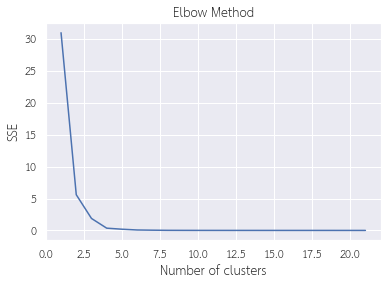

In [554]:
max_k = 22
sse = []
for i in range(1, max_k):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(k_mean_2564_4_normalized)
    sse.append(kmeans.inertia_)
plt.plot(range(1, max_k), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

In [555]:
k_4=3

In [556]:
kmeans_4 = KMeans(n_clusters=k_4)
kmeans_4.fit(k_mean_2564_4_normalized)

KMeans(n_clusters=3)

In [557]:
cluster_predictions = kmeans_4.predict(k_mean_2564_4_normalized)
k_mean_2564_4['cluster_id'] = cluster_predictions
k_mean_2564_4

,งบเงินอุดหนุน,cluster_id
0,370782.6,1
1,12397.0,0
2,4794.4,0
3,599.4,0
4,1348.7,0
5,735.9,0
6,16598.3,0
7,104384.6,2
8,2001.1,0
9,57.1,0


In [558]:
k_mean_2564_4.cluster_id.value_counts()

0    25
2     4
1     2
Name: cluster_id, dtype: int64

In [559]:
print(metrics.silhouette_score(k_mean_2564_4,kmeans_4.labels_))

0.8367601175058708


In [560]:
print(metrics.davies_bouldin_score(k_mean_2564_4,kmeans_4.labels_))

0.32734358107705686


In [561]:
'''

    งบรายจ่ายอื่น(1.5)

'''

'\n\n    งบรายจ่ายอื่น(1.5)\n\n'

In [562]:
k_mean_2564_5=main_2564[['งบรายจ่ายอื่น']]
k_mean_2564_5.replace({'-':np.nan},inplace=True)
k_mean_2564_5=k_mean_2564_5.dropna()
k_mean_2564_5.tail()

C:\Users\TTCOM\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,งบรายจ่ายอื่น
20,1516.2
21,3321.6
22,783.3
23,120057.9
31,203108.1


In [563]:
''' 

    CODE FOR CUT OUTLINER

'''

' \n\n    CODE FOR CUT OUTLINER\n\n'

<AxesSubplot:>

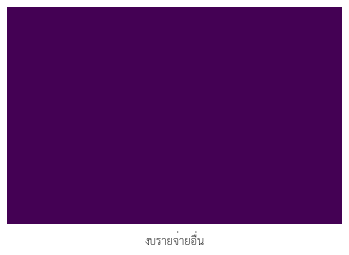

In [564]:
sns.heatmap(k_mean_2564_5.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [565]:
k_mean_2564_5.describe()

,งบรายจ่ายอื่น
count,25.000000
mean,31696.500000
std,65781.016656
min,79.800000
25%,783.300000
50%,1630.900000
75%,13606.800000
max,244863.500000


In [566]:
scaler = StandardScaler()
array_normalized = scaler.fit_transform(k_mean_2564_5)
k_mean_2564_5_normalized = pd.DataFrame(array_normalized)
k_mean_2564_5_normalized.head()

,0
0,0.695543
1,-0.280669
2,0.752239
3,3.307378
4,-0.473115


In [567]:
k_mean_2564_5_normalized.describe()

,0
count,2.500000e+01
mean,-1.776357e-17
std,1.020621e+00
min,-4.905467e-01
25%,-4.796316e-01
50%,-4.664807e-01
75%,-2.806695e-01
max,3.307378e+00


Text(0, 0.5, 'SSE')

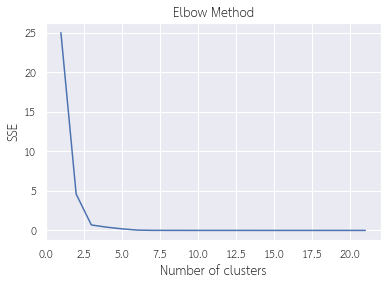

In [568]:
max_k = 22
sse = []
for i in range(1, max_k):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(k_mean_2564_5_normalized)
    sse.append(kmeans.inertia_)
plt.plot(range(1, max_k), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

In [569]:
k_5=3

In [570]:
kmeans_5 = KMeans(n_clusters=k_5)
kmeans_5.fit(k_mean_2564_5_normalized)

KMeans(n_clusters=3)

In [571]:
cluster_predictions = kmeans_5.predict(k_mean_2564_5_normalized)
k_mean_2564_5['cluster_id'] = cluster_predictions
k_mean_2564_5

,งบรายจ่ายอื่น,cluster_id
0,76525.6,0
1,13606.8,1
2,80179.8,0
3,244863.5,2
4,1203.3,1
5,1327.7,1
6,79.8,1
7,1597.7,1
8,564.8,1
9,751.6,1


In [572]:
k_mean_2564_5.cluster_id.value_counts()

1    20
0     3
2     2
Name: cluster_id, dtype: int64

In [573]:
print(metrics.silhouette_score(k_mean_2564_5,kmeans_5.labels_))

0.8852662834772083


In [574]:
print(metrics.davies_bouldin_score(k_mean_2564_5,kmeans_5.labels_))

0.282891946378849


# Hierarchical

In [575]:
# Code

In [576]:
main_2564=pd.read_excel('assignment2_clustering_data.xlsx', sheet_name='2564').drop(32)
main_2564.tail()

,กระทรวง-งบรายจ่าย,งบบุคลากร,งบดําเนินงาน,งบลงทุน,งบเงินอุดหนุน,งบรายจ่ายอื่น,รวม
27,องค์กรปกครองส่วนท้องถิ่น,-,-,-,91348.5,-,91348.5
28,หน่วยงานอื่นของรัฐ,-,-,-,563.2,-,563.2
29,สภากาชาดไทย,-,-,-,8871.6,-,8871.6
30,ส่วนราชการในพระองค์,-,-,-,8980.9,-,8980.9
31,ทุนหมุนเวียน,-,-,-,19916.6,203108.1,223024.7


In [577]:
'''

    งบบุคลากร(2.1)

'''

'\n\n    งบบุคลากร(2.1)\n\n'

In [578]:
Hierarchical_2564_1=main_2564[['งบบุคลากร']]
Hierarchical_2564_1.replace({'-':np.nan},inplace=True)
Hierarchical_2564_1=Hierarchical_2564_1.dropna()
Hierarchical_2564_1.tail()

C:\Users\TTCOM\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,งบบุคลากร
17,2321.9
18,223199.6
19,107548.0
20,1635.9
21,82025.0


In [579]:
'''

    CODE FROM CUT OUTLIER

'''

'\n\n    CODE FROM CUT OUTLIER\n\n'

In [580]:
scaler = StandardScaler()
array_normalized = scaler.fit_transform(Hierarchical_2564_1)
Hierarchical_2564_1_normalized = pd.DataFrame(array_normalized)
Hierarchical_2564_1_normalized.head()

,0
0,-0.262400
1,-0.481362
2,1.188844
3,-0.310663
4,-0.508401


In [581]:
# Set up parameter values
linkage_val = 'average'  # 'others are 'complete', 'single', 'ward'
dist_threshold_val = 0   # Set to be zero to plot dendrogram
nclusters_val = None     # if distance_threshold is 0, this must be None

In [582]:
model_H1=AgglomerativeClustering(linkage=linkage_val,n_clusters=nclusters_val,distance_threshold=dist_threshold_val)
model_H1=model_H1.fit(Hierarchical_2564_1_normalized)
model_H1

AgglomerativeClustering(distance_threshold=0, linkage='average',
                        n_clusters=None)

In [583]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

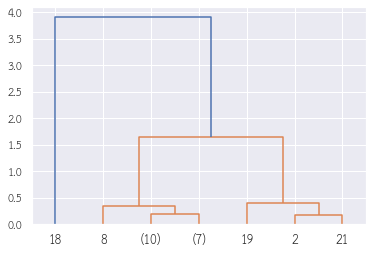

In [584]:
plot_dendrogram(model_H1, truncate_mode='level', p=3)
#เลือก 3 เพราะว่าหากมากกว่านี้จะได้ค่า dist_threshold_val ต่ำกว่า 0.5

In [585]:
dist_threshold_val = 1
nclusters_val = None

In [586]:
model_H1=AgglomerativeClustering(linkage=linkage_val,n_clusters=nclusters_val,distance_threshold=dist_threshold_val)
model_H1=model_H1.fit(Hierarchical_2564_1_normalized)
model_H1

AgglomerativeClustering(distance_threshold=1, linkage='average',
                        n_clusters=None)

In [587]:
labels = model_H1.labels_
labels

array([2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 0],
      dtype=int64)

In [588]:
cluster_ids = pd.Series(labels).unique()
cluster_ids 

array([2, 0, 1], dtype=int64)

In [589]:
cluster_predictions = model_H1.fit_predict(Hierarchical_2564_1_normalized)
Hierarchical_2564_1['cluster_id'] = cluster_predictions
Hierarchical_2564_1.tail(10)

,งบบุคลากร,cluster_id
12,822.0,2
13,2216.4,2
14,19360.2,2
15,10363.6,2
16,3671.6,2
17,2321.9,2
18,223199.6,1
19,107548.0,0
20,1635.9,2
21,82025.0,0


In [590]:
print(metrics.silhouette_score(Hierarchical_2564_1,labels))

0.8513819578575343


In [591]:
print(metrics.davies_bouldin_score(Hierarchical_2564_1,model_H1.labels_))

0.1425635530569033


In [592]:
'''

    งบดําเนินงาน(2.2)

'''

'\n\n    งบดําเนินงาน(2.2)\n\n'

In [593]:
Hierarchical_2564_2=main_2564[['งบดําเนินงาน']]
Hierarchical_2564_2.replace({'-':np.nan},inplace=True)
Hierarchical_2564_2=Hierarchical_2564_2.dropna()
Hierarchical_2564_2.tail()

C:\Users\TTCOM\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,งบดําเนินงาน
18,20029.5
19,14411.4
20,603.4
21,18260.1
22,2824.2


In [594]:
'''

    CODE FROM CUT OUTLIER

'''

'\n\n    CODE FROM CUT OUTLIER\n\n'

In [595]:
scaler = StandardScaler()
array_normalized = scaler.fit_transform(Hierarchical_2564_2)
Hierarchical_2564_2_normalized = pd.DataFrame(array_normalized)
Hierarchical_2564_2_normalized.head()

,0
0,4.353940
1,-0.387989
2,0.760203
3,-0.197416
4,-0.419047


In [596]:
# Set up parameter values
linkage_val = 'average'  # 'others are 'complete', 'single', 'ward'
dist_threshold_val = 0   # Set to be zero to plot dendrogram
nclusters_val = None     # if distance_threshold is 0, this must be None


In [597]:
model_H2=AgglomerativeClustering(linkage=linkage_val,n_clusters=nclusters_val,distance_threshold=dist_threshold_val)
model_H2=model_H2.fit(Hierarchical_2564_2_normalized)
model_H2


AgglomerativeClustering(distance_threshold=0, linkage='average',
                        n_clusters=None)

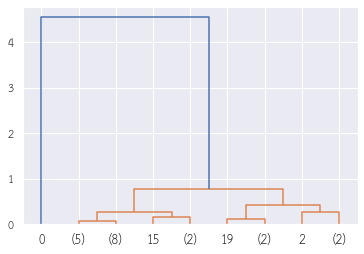

In [598]:
plot_dendrogram(model_H2, truncate_mode='level', p=3)
#เลือก 3 เพราะว่าหากมากกว่านี้จะได้ค่า dist_threshold_val ต่ำกว่า 0.5

In [599]:
dist_threshold_val = 1
nclusters_val = None

In [600]:
model_H2=AgglomerativeClustering(linkage=linkage_val,n_clusters=nclusters_val,distance_threshold=dist_threshold_val)
model_H2=model_H2.fit(Hierarchical_2564_2_normalized)
model_H2

AgglomerativeClustering(distance_threshold=1, linkage='average',
                        n_clusters=None)

In [601]:
labels = model_H2.labels_
labels


array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=int64)

In [602]:
cluster_ids = pd.Series(labels).unique()
cluster_ids 

array([1, 0], dtype=int64)

In [603]:
cluster_predictions = model_H2.fit_predict(Hierarchical_2564_2_normalized)
Hierarchical_2564_2['cluster_id'] = cluster_predictions
Hierarchical_2564_2.tail(10)

,งบดําเนินงาน,cluster_id
13,1585.4,0
14,12718.1,0
15,8775.0,0
16,1375.7,0
17,1430.5,0
18,20029.5,0
19,14411.4,0
20,603.4,0
21,18260.1,0
22,2824.2,0


In [604]:
print(metrics.silhouette_score(Hierarchical_2564_2,labels))

0.8662164761812253


In [605]:
print(metrics.davies_bouldin_score(Hierarchical_2564_2,model_H2.labels_))

0.06968430861359363


In [606]:
'''

    งบลงทุน(1.3)

'''

'\n\n    งบลงทุน(1.3)\n\n'

In [607]:
Hierarchical_2564_3=main_2564[['งบลงทุน']]
Hierarchical_2564_3.replace({'-':np.nan},inplace=True)
Hierarchical_2564_3=Hierarchical_2564_3.dropna()
Hierarchical_2564_3.tail()

C:\Users\TTCOM\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,งบลงทุน
19,17025.5
20,745.8
21,20895.0
22,19502.0
23,17357.8


In [608]:
'''

    CODE FROM CUT OUTLIER

'''

'\n\n    CODE FROM CUT OUTLIER\n\n'

In [609]:
scaler = StandardScaler()
array_normalized = scaler.fit_transform(Hierarchical_2564_3)
Hierarchical_2564_3_normalized = pd.DataFrame(array_normalized)
Hierarchical_2564_3_normalized.head()

,0
0,1.095478
1,-0.393078
2,-0.171063
3,-0.464659
4,-0.545328


In [610]:
# Set up parameter values
linkage_val = 'average'  # 'others are 'complete', 'single', 'ward'
dist_threshold_val = 0   # Set to be zero to plot dendrogram
nclusters_val = None     # if distance_threshold is 0, this must be None

In [611]:
model_H3=AgglomerativeClustering(linkage=linkage_val,n_clusters=nclusters_val,distance_threshold=dist_threshold_val)
model_H3=model_H3.fit(Hierarchical_2564_3_normalized)
model_H3

AgglomerativeClustering(distance_threshold=0, linkage='average',
                        n_clusters=None)

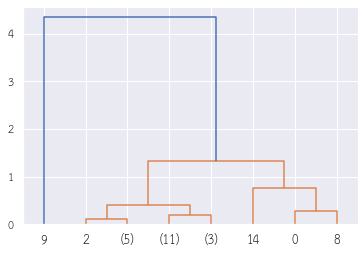

In [612]:
plot_dendrogram(model_H3, truncate_mode='level', p=3)
#เลือก 3 เพราะว่าหากมากกว่านี้จะได้ค่า dist_threshold_val ต่ำกว่า 0.5

In [613]:
dist_threshold_val = 1
nclusters_val = None
# เพราะแบ่งได้ 3 กลุ่ม

In [614]:
model_H3=AgglomerativeClustering(linkage=linkage_val,n_clusters=nclusters_val,distance_threshold=dist_threshold_val)
model_H3=model_H3.fit(Hierarchical_2564_3_normalized)
model_H3


AgglomerativeClustering(distance_threshold=1, linkage='average',
                        n_clusters=None)

In [615]:
labels = model_H3.labels_
labels

array([0, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int64)

In [616]:
cluster_ids = pd.Series(labels).unique()
cluster_ids

array([0, 2, 1], dtype=int64)

In [617]:
cluster_predictions = model_H3.fit_predict(Hierarchical_2564_3_normalized)
Hierarchical_2564_3['cluster_id'] = cluster_predictions
Hierarchical_2564_3.tail(10)

,งบลงทุน,cluster_id
14,38441.4,0
15,3333.1,2
16,375.7,2
17,2325.4,2
18,19437.0,2
19,17025.5,2
20,745.8,2
21,20895.0,2
22,19502.0,2
23,17357.8,2


In [618]:
print(metrics.silhouette_score(Hierarchical_2564_3,labels))

0.7390527220988732


In [619]:
print(metrics.davies_bouldin_score(Hierarchical_2564_3,model_H3.labels_))


0.2969922246832037


In [620]:
'''

    งบเงินอุดหนุน(2.4)

'''

'\n\n    งบเงินอุดหนุน(2.4)\n\n'

In [621]:
Hierarchical_2564_4=main_2564[['งบเงินอุดหนุน']]
Hierarchical_2564_4.replace({'-':np.nan},inplace=True)
Hierarchical_2564_4=Hierarchical_2564_4.dropna()
Hierarchical_2564_4.tail()

C:\Users\TTCOM\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,งบเงินอุดหนุน
27,91348.5
28,563.2
29,8871.6
30,8980.9
31,19916.6


In [622]:
'''

    CODE FROM CUT OUTLIER

'''

'\n\n    CODE FROM CUT OUTLIER\n\n'

In [623]:
scaler = StandardScaler()
array_normalized = scaler.fit_transform(Hierarchical_2564_4)
Hierarchical_2564_4_normalized = pd.DataFrame(array_normalized)
Hierarchical_2564_4_normalized.head()

,0
0,4.319938
1,-0.305367
2,-0.403486
3,-0.457627
4,-0.447956


In [624]:
# Set up parameter values
linkage_val = 'average'  # 'others are 'complete', 'single', 'ward'
dist_threshold_val = 0   # Set to be zero to plot dendrogram
nclusters_val = None     # if distance_threshold is 0, this must be None

In [625]:
model_H4=AgglomerativeClustering(linkage=linkage_val,n_clusters=nclusters_val,distance_threshold=dist_threshold_val)
model_H4=model_H4.fit(Hierarchical_2564_4_normalized)
model_H4

AgglomerativeClustering(distance_threshold=0, linkage='average',
                        n_clusters=None)

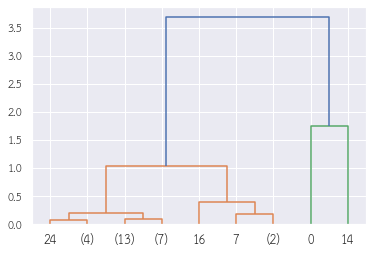

In [626]:
plot_dendrogram(model_H4, truncate_mode='level', p=3)
#เลือก 3 เพราะว่าหากมากกว่านี้จะได้ค่า dist_threshold_val ต่ำกว่า 0.5

In [627]:
dist_threshold_val = 1
nclusters_val = None

In [628]:
model_H4=AgglomerativeClustering(linkage=linkage_val,n_clusters=nclusters_val,distance_threshold=dist_threshold_val)
model_H4=model_H4.fit(Hierarchical_2564_4_normalized)
model_H4

AgglomerativeClustering(distance_threshold=1, linkage='average',
                        n_clusters=None)

In [629]:
labels = model_H4.labels_
labels

array([2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 3, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [630]:
cluster_ids = pd.Series(labels).unique()
cluster_ids 

array([2, 1, 0, 3], dtype=int64)

In [631]:
cluster_predictions = model_H4.fit_predict(Hierarchical_2564_4_normalized)
Hierarchical_2564_4['cluster_id'] = cluster_predictions
Hierarchical_2564_4.tail(10)

,งบเงินอุดหนุน,cluster_id
21,6272.7,1
23,16276.6,1
24,9606.3,1
25,23288.9,1
26,17764.3,1
27,91348.5,0
28,563.2,1
29,8871.6,1
30,8980.9,1
31,19916.6,1


In [632]:
print(metrics.silhouette_score(Hierarchical_2564_4,labels))


0.8170115163057168


In [633]:
print(metrics.davies_bouldin_score(Hierarchical_2564_4,model_H4.labels_))

0.13953885893414175


In [ ]:
'''

    งบรายจ่ายอื่น(2.5)

'''

In [636]:
Hierarchical_2564_5=main_2564[['งบรายจ่ายอื่น']]
Hierarchical_2564_5.replace({'-':np.nan},inplace=True)
Hierarchical_2564_5=Hierarchical_2564_5.dropna()
Hierarchical_2564_5.tail()

C:\Users\TTCOM\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,งบรายจ่ายอื่น
20,1516.2
21,3321.6
22,783.3
23,120057.9
31,203108.1


In [637]:
scaler = StandardScaler()
array_normalized = scaler.fit_transform(Hierarchical_2564_5)
Hierarchical_2564_5_normalized = pd.DataFrame(array_normalized)
Hierarchical_2564_5_normalized.head()

,0
0,0.695543
1,-0.280669
2,0.752239
3,3.307378
4,-0.473115


In [638]:
# Set up parameter values
linkage_val = 'average'  # 'others are 'complete', 'single', 'ward'
dist_threshold_val = 0   # Set to be zero to plot dendrogram
nclusters_val = None     # if distance_threshold is 0, this must be None


In [639]:
model_H5=AgglomerativeClustering(linkage=linkage_val,n_clusters=nclusters_val,distance_threshold=dist_threshold_val)
model_H5=model_H5.fit(Hierarchical_2564_5_normalized)
model_H5

AgglomerativeClustering(distance_threshold=0, linkage='average',
                        n_clusters=None)

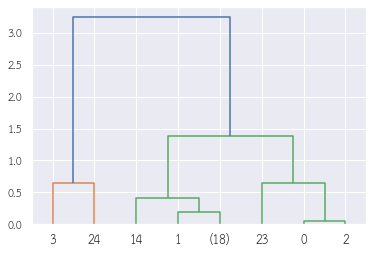

In [642]:
plot_dendrogram(model_H5, truncate_mode='level', p=3)
#เลือก 3 เพราะว่าหากมากกว่านี้จะได้ค่า dist_threshold_val ต่ำกว่า 0.5

In [643]:
dist_threshold_val = 1
nclusters_val = None

In [644]:
model_H5=AgglomerativeClustering(linkage=linkage_val,n_clusters=nclusters_val,distance_threshold=dist_threshold_val)
model_H5=model_H5.fit(Hierarchical_2564_5_normalized)
model_H5

AgglomerativeClustering(distance_threshold=1, linkage='average',
                        n_clusters=None)

In [645]:
labels = model_H5.labels_
labels

array([1, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 0], dtype=int64)

In [646]:
cluster_ids = pd.Series(labels).unique()
cluster_ids 

array([1, 2, 0], dtype=int64)

In [647]:
cluster_predictions = model_H5.fit_predict(Hierarchical_2564_5_normalized)
Hierarchical_2564_5['cluster_id'] = cluster_predictions
Hierarchical_2564_5.tail(10)

,งบรายจ่ายอื่น,cluster_id
15,2418.8,2
16,584.4,2
17,814.4,2
18,5154.7,2
19,179.9,2
20,1516.2,2
21,3321.6,2
22,783.3,2
23,120057.9,1
31,203108.1,0


In [648]:
print(metrics.silhouette_score(Hierarchical_2564_5,labels))

0.8852662834722592


In [649]:
print(metrics.davies_bouldin_score(Hierarchical_2564_5,model_H5.labels_))

0.28289194639609055


# DBScan

In [634]:
# Code

# Part 2

ใช้งบประมาณรายจ่ายส่วนย่อย 5 ด้าน ในปี 2560-2564  จัดกลุ่มกระทรวงตามงบประมาณรายจ่าย แยกตามปี (ไม่รวมทุกปีเข้าด้วยกัน)  ด้วยวิธี K-mean


In [635]:
# Code